In [ ]:
#Component 2 

In [ ]:
#2.1 Load and Explore the Dataset

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [273]:
df=pd.read_csv("D:\\Upgrad\\Mentorship\\uber.csv")

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [275]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [276]:
#drop Unknow Column
df=df.drop(columns=["Unnamed: 0"])

In [185]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [277]:
#Converting datatype of Date and time column since its on object format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                200000 non-null  object             
 1   fare_amount        200000 non-null  float64            
 2   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   200000 non-null  float64            
 4   pickup_latitude    200000 non-null  float64            
 5   dropoff_longitude  199999 non-null  float64            
 6   dropoff_latitude   199999 non-null  float64            
 7   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [278]:
#Remove rows having 0 value in geo cordinates columns since these values are of no use.
df_Filtered = df[(df['pickup_latitude'] != 0) &
                                        (df['pickup_longitude'] != 0) &
                                        (df['dropoff_latitude'] != 0) &
                                        (df['dropoff_longitude'] != 0)]

In [279]:
# Further filter out rows where passenger_count is zero or extremely high
passenger_count_min, passenger_count_max = 1, 6  # Assuming typical passenger count ranges from 1 to 6
df_Filtered1 = df_Filtered[(df_Filtered['passenger_count'] >= passenger_count_min) &
                                  (df_Filtered['passenger_count'] <= passenger_count_max)]

In [280]:
df_Filtered1.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,195344.000000,195344.000000,195344.000000,195344.000000,195344.000000,195344.000000
mean,11.350020,-73.929891,40.705429,-73.916905,40.688366,1.690090
std,9.808273,5.458941,5.436378,8.533175,4.001281,1.306077
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,1.000000
25%,6.000000,-73.992268,40.736393,-73.991593,40.735267,1.000000
50%,8.500000,-73.982102,40.753279,-73.980523,40.753724,1.000000
75%,12.500000,-73.968317,40.767540,-73.965317,40.768321,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,6.000000


In [281]:
#Remove outliers based on realistic bounds for latitude and longitude
lat_min, lat_max = -90, 90
long_min, long_max = -180, 180
df_Cleaned = df_Filtered1[(df_Filtered1['pickup_latitude'].between(lat_min, lat_max)) &
                                       (df_Filtered1['pickup_longitude'].between(long_min, long_max)) &
                                       (df_Filtered1['dropoff_latitude'].between(lat_min, lat_max)) &
                                       (df_Filtered1['dropoff_longitude'].between(long_min, long_max))]

In [282]:
df_Cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195332 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                195332 non-null  object             
 1   fare_amount        195332 non-null  float64            
 2   pickup_datetime    195332 non-null  datetime64[ns, UTC]
 3   pickup_longitude   195332 non-null  float64            
 4   pickup_latitude    195332 non-null  float64            
 5   dropoff_longitude  195332 non-null  float64            
 6   dropoff_latitude   195332 non-null  float64            
 7   passenger_count    195332 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 13.4+ MB


In [283]:
df_Cleaned = df_Cleaned[df_Cleaned['fare_amount'] > 0]

In [284]:
df_Cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195313 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                195313 non-null  object             
 1   fare_amount        195313 non-null  float64            
 2   pickup_datetime    195313 non-null  datetime64[ns, UTC]
 3   pickup_longitude   195313 non-null  float64            
 4   pickup_latitude    195313 non-null  float64            
 5   dropoff_longitude  195313 non-null  float64            
 6   dropoff_latitude   195313 non-null  float64            
 7   passenger_count    195313 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 13.4+ MB


In [285]:
# Create separate columns for date and time
df_Cleaned['pickup_date'] = df_Cleaned['pickup_datetime'].dt.date
df_Cleaned['pickup_time'] = df_Cleaned['pickup_datetime'].dt.time

In [286]:
df_Cleaned.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,08:22:21
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,17:47:00


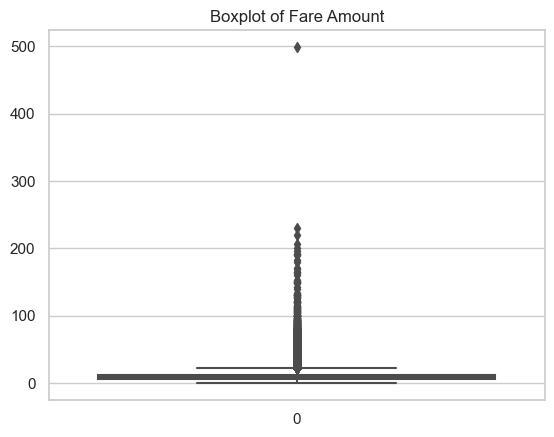

In [287]:
import seaborn as sns
# Visualizing the distribution of fare_amount
sns.boxplot(df_Cleaned['fare_amount'])
plt.title('Boxplot of Fare Amount')
plt.show()

In [288]:
# Removing outliers based on fare amount
# Assuming a typical fare should be between $2.5 and $300
df_Cleaned = df_Cleaned[(df_Cleaned['fare_amount'] >= 2.5) & (df_Cleaned['fare_amount'] <= 300)]

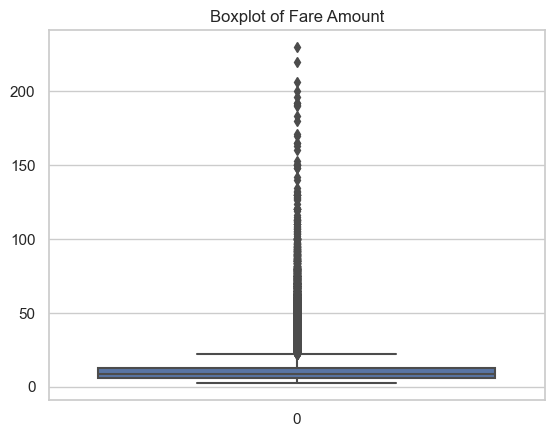

In [289]:
import seaborn as sns
# Visualizing the distribution of fare_amount
sns.boxplot(df_Cleaned['fare_amount'])
plt.title('Boxplot of Fare Amount')
plt.show()

In [ ]:
# As per the above boxplot graph its seems that the mean value lies between 2.5 and 5 

In [290]:
df_Cleaned.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,08:22:21
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,17:47:00


In [291]:
# Create a new column 'day_or_night'
# Extract hour from pickup_time
df_Cleaned['hour'] = df_Cleaned['pickup_time'].apply(lambda x: x.hour)
# Create 'day_or_night' column
def categorize_time(hour):
    if 6 <= hour < 18:
        return 'day'
    else:
        return 'night'

df_Cleaned['day_or_night'] = df_Cleaned['hour'].apply(categorize_time)

# Display the first few rows to verify
print(df_Cleaned[['pickup_time', 'hour', 'day_or_night']].head())

  pickup_time  hour day_or_night
0    19:52:06    19        night
1    20:04:56    20        night
2    21:45:00    21        night
3    08:22:21     8          day
4    17:47:00    17          day


In [299]:
# Haversine formula to calculate distance between two points in kilometers
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])  # Convert degrees to radians
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

In [300]:
# Calculate distance for each row
df_Cleaned['distance'] = df_Cleaned.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'],
                                                row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

# Display the first few rows to verify
print(df_Cleaned[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'distance']].head())

   pickup_latitude  pickup_longitude  dropoff_latitude  dropoff_longitude  \
0        40.738354        -73.999817         40.723217         -73.999512   
1        40.728225        -73.994355         40.750325         -73.994710   
2        40.740770        -74.005043         40.772647         -73.962565   
3        40.790844        -73.976124         40.803349         -73.965316   
4        40.744085        -73.925023         40.761247         -73.973082   

   distance  
0  1.683323  
1  2.457590  
2  5.036377  
3  1.661683  
4  4.475450  


In [301]:
df_Cleaned = df_Cleaned[df_Cleaned['distance'] > 0]

In [302]:
# Extract the day of the week (e.g., Monday, Tuesday)
df_Cleaned['pickup_date'] = pd.to_datetime(df_Cleaned['pickup_date'], errors='coerce')

# Ensure that the column is in datetime format
print(df_Cleaned['pickup_date'].dtype)  # Should show 'datetime64[ns]'

# Extract the day of the week (e.g., Monday, Tuesday)
df_Cleaned['day_of_week'] = df_Cleaned['pickup_date'].dt.day_name()
df_Cleaned.head()

datetime64[ns]


C:\Users\Priyanka\AppData\Local\Temp\ipykernel_8644\2431567532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Cleaned['pickup_date'] = pd.to_datetime(df_Cleaned['pickup_date'], errors='coerce')
C:\Users\Priyanka\AppData\Local\Temp\ipykernel_8644\2431567532.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Cleaned['day_of_week'] = df_Cleaned['pickup_date'].dt.day_name()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time,hour,day_or_night,day_of_week,distance
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06,19,night,Thursday,1.683323
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56,20,night,Friday,2.457590
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00,21,night,Monday,5.036377
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,08:22:21,8,day,Friday,1.661683
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,17:47:00,17,day,Thursday,4.475450


In [303]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [304]:
sns.set(style="whitegrid")

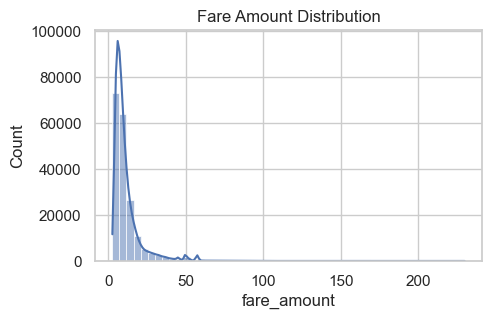

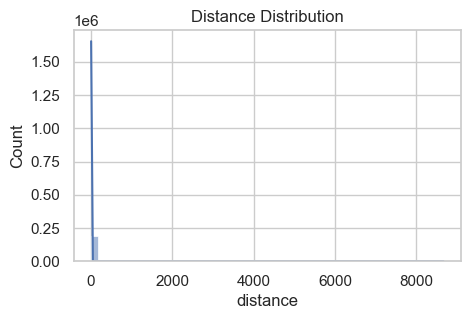

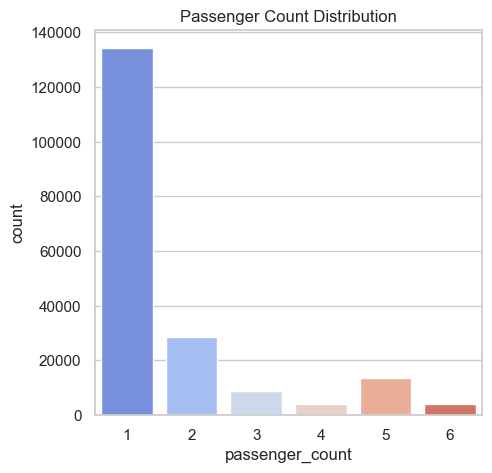

In [305]:
# 1. Fare Amount Distribution
plt.figure(figsize=(5,3))
sns.histplot(df_Cleaned['fare_amount'], bins=50, kde=True)
plt.title('Fare Amount Distribution')
plt.show()
# 2. Distance Distribution
plt.figure(figsize=(5,3))
sns.histplot(df_Cleaned['distance'], bins=50, kde=True)
plt.title('Distance Distribution')
plt.show()
# 3. Passenger Count Distribution
plt.figure(figsize=(5, 5))
sns.countplot(x='passenger_count', data=df_Cleaned, palette='coolwarm')
plt.title('Passenger Count Distribution')
plt.show()

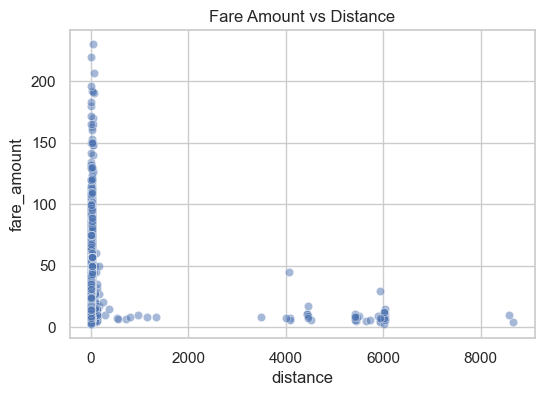

In [307]:
# 4. Fare Amount vs Distance
plt.figure(figsize=(6, 4))
sns.scatterplot(x='distance', y='fare_amount', data=df_Cleaned, alpha=0.5)
plt.title('Fare Amount vs Distance')
plt.show()

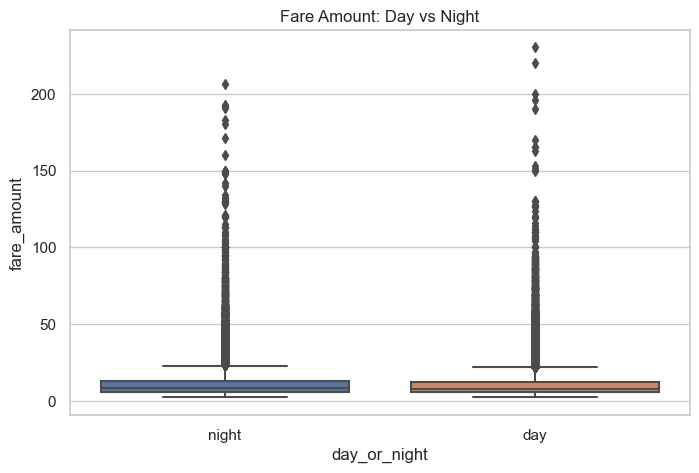

In [105]:
# 5. Day or Night Analysis
plt.figure(figsize=(8, 5))
sns.boxplot(x='day_or_night', y='fare_amount', data=df_Cleaned)
plt.title('Fare Amount: Day vs Night')
plt.show()

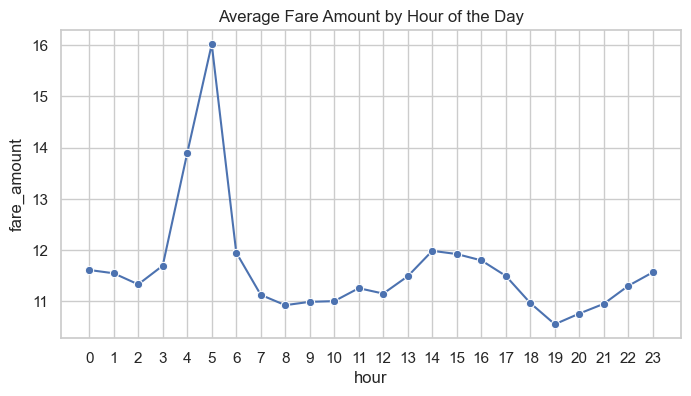

In [308]:
# 6. Line Plot for Fare Amount by Pickup Hour ----
plt.figure(figsize=(8, 4))
sns.lineplot(x='hour', y='fare_amount', data=df_Cleaned, ci=None, marker='o')
plt.title('Average Fare Amount by Hour of the Day')
plt.xticks(range(0, 24))
plt.show()

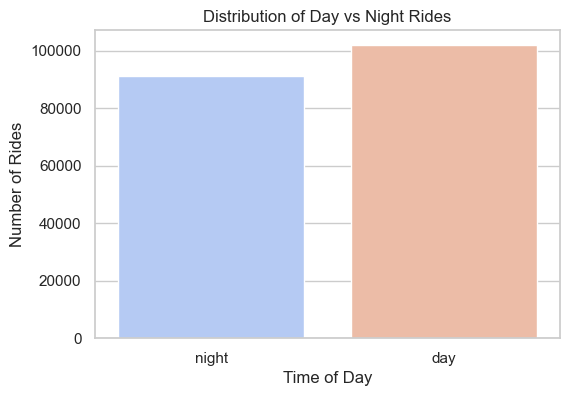

In [206]:
# 7. Distribution of Day vs Night Rides
plt.figure(figsize=(6, 4))
sns.countplot(x='day_or_night',data=df_Cleaned, palette='coolwarm')
plt.title('Distribution of Day vs Night Rides')
plt.xlabel('Time of Day')
plt.ylabel('Number of Rides')
plt.show()

In [ ]:
## Split the Dataset

In [221]:
# Split the dataset into train and test sets (80% train, 20% test)
train_data, test_data = train_test_split(df_Cleaned, test_size=0.2, random_state=42)

# Print the shape of the datasets
print("Train Set Shape:", train_data.shape)
print("Test Set Shape:", test_data.shape)

Train Set Shape: (154616, 14)
Test Set Shape: (38654, 14)


In [208]:
train_data_N, test_data_N = train_test_split(df_Cleaned, test_size=0.2, random_state=42)

In [209]:
## Data Scaling/Normalization-

'''Since Fare Amount and Distance are continuous variables with no strict boundaries.
It’s possible that dataset has outliers (like very high fares or long trips).

Hence using Standard Scaling because: dataset likely contains outliers.
Regression models like Linear Regression and Ridge/Lasso Regression perform better with standardized features.

'''

'Since Fare Amount and Distance are continuous variables with no strict boundaries.\nIt’s possible that dataset has outliers (like very high fares or long trips).\n\nHence using Standard Scaling because: dataset likely contains outliers.\nRegression models like Linear Regression and Ridge/Lasso Regression perform better with standardized features.\n\n'

In [222]:
# Identify numerical columns to scale
numerical_cols = ['fare_amount', 'distance']

In [214]:
#Code for Data Scaling Using StandardScaler:
from sklearn.preprocessing import StandardScaler

# Apply Standardization
scaler = StandardScaler()
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])
test_data[numerical_cols] = scaler.transform(test_data[numerical_cols])

# Print standardized data
print("Standardized Train Data (First 5 Rows):")
print(train_data.head())

Standardized Train Data (First 5 Rows):
                                  key  fare_amount           pickup_datetime  \
14179    2009-09-14 02:04:00.00000011    -0.495902 2009-09-14 02:04:00+00:00   
69953     2013-07-16 21:53:45.0000002     1.801784 2013-07-16 21:53:45+00:00   
66051     2011-12-18 18:54:10.0000002    -0.332511 2011-12-18 18:54:10+00:00   
115275  2011-05-12 07:45:00.000000111    -0.414207 2011-05-12 07:45:00+00:00   
89436     2015-06-26 20:26:36.0000003    -0.444842 2015-06-26 20:26:36+00:00   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
14179         -73.980162        40.760695         -73.956752   
69953         -73.979746        40.752608         -73.986314   
66051         -73.973032        40.754956         -73.996718   
115275        -73.987877        40.721132         -74.005660   
89436         -73.967239        40.803719         -73.974075   

        dropoff_latitude  passenger_count pickup_date pickup_time  hour  \
14179          40.7

In [211]:
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns to scale
numerical_cols = ['fare_amount', 'distance']

# Apply Min-Max Scaling
scaler = MinMaxScaler()
train_data_N[numerical_cols] = scaler.fit_transform(train_data_N[numerical_cols])
test_data_N[numerical_cols] = scaler.transform(test_data_N[numerical_cols])

# Print scaled data
print("Scaled Train Data (First 5 Rows):")
print(train_data.head())

Scaled Train Data (First 5 Rows):
                                  key  fare_amount           pickup_datetime  \
14179    2009-09-14 02:04:00.00000011          6.5 2009-09-14 02:04:00+00:00   
69953     2013-07-16 21:53:45.0000002         29.0 2013-07-16 21:53:45+00:00   
66051     2011-12-18 18:54:10.0000002          8.1 2011-12-18 18:54:10+00:00   
115275  2011-05-12 07:45:00.000000111          7.3 2011-05-12 07:45:00+00:00   
89436     2015-06-26 20:26:36.0000003          7.0 2015-06-26 20:26:36+00:00   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
14179         -73.980162        40.760695         -73.956752   
69953         -73.979746        40.752608         -73.986314   
66051         -73.973032        40.754956         -73.996718   
115275        -73.987877        40.721132         -74.005660   
89436         -73.967239        40.803719         -73.974075   

        dropoff_latitude  passenger_count pickup_date pickup_time  hour  \
14179          40.771492 

In [309]:
df_Cleaned.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time,hour,day_or_night,day_of_week,distance
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06,19,night,Thursday,1.683323
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56,20,night,Friday,2.457590
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00,21,night,Monday,5.036377
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,08:22:21,8,day,Friday,1.661683
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,17:47:00,17,day,Thursday,4.475450


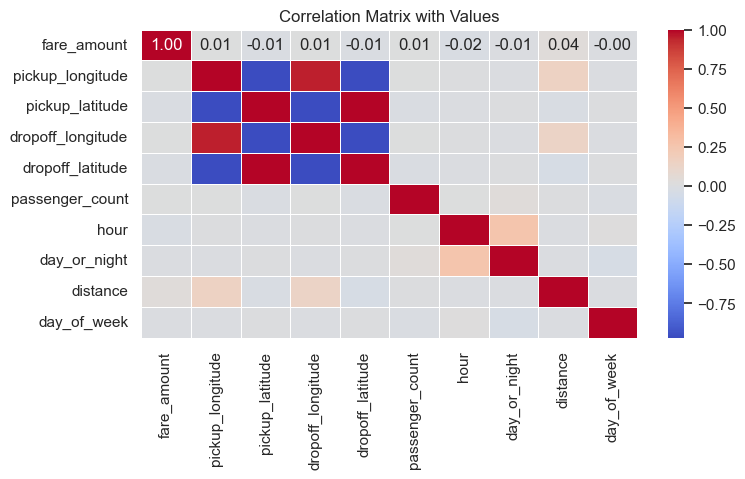


Correlation with Fare Amount:
fare_amount          1.000000
distance             0.036615
passenger_count      0.011919
pickup_longitude     0.010974
dropoff_longitude    0.009375
day_of_week         -0.002556
day_or_night        -0.005412
pickup_latitude     -0.008414
dropoff_latitude    -0.008452
hour                -0.020717
Name: fare_amount, dtype: float64


In [224]:
# find Correlation
from sklearn.preprocessing import LabelEncoder

# Label Encoding for categorical columns
label_encoder = LabelEncoder()

df_Cleaned['day_or_night'] = label_encoder.fit_transform(df_Cleaned['day_or_night'])
df_Cleaned['day_of_week'] = label_encoder.fit_transform(df_Cleaned['day_of_week'])

# Select only numeric columns for correlation
numeric_cols = df_Cleaned.select_dtypes(include=['number']).columns

# Compute the correlation matrix
correlation_matrix = df_Cleaned[numeric_cols].corr()

# Plot the heatmap with correlation values inside the matrix
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix with Values')
plt.show()

# Focus on 'fare_amount' correlations and sort
correlation_with_fare = correlation_matrix['fare_amount'].sort_values(ascending=False)
print("\nCorrelation with Fare Amount:")
print(correlation_with_fare)

In [ ]:
#since we have not not able to see any correlation performing EDA or more in depth analysis of dataset

In [315]:
df_Cleaned2=df_Cleaned
df_Cleaned3=df_Cleaned
df_Cleaned.shape

(193266, 14)

In [316]:
# Remove duplicates based on specific columns
df_Cleaned2 = df_Cleaned.drop_duplicates(subset=['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])

# Check the new shape of the dataset
print(f"Dataset shape after removing duplicates: {df_Cleaned.shape}")

Dataset shape after removing duplicates: (193266, 14)


In [317]:
#Performing Z-score to remove Outliers
from scipy import stats

# Z-score threshold
threshold = 3

# Remove outliers from 'distance'
df_Cleaned2 = df_Cleaned2[(np.abs(stats.zscore(df_Cleaned2['distance'])) < 2.5)]

# Remove outliers from 'fare_amount'
df_Cleaned2 = df_Cleaned2[(np.abs(stats.zscore(df_Cleaned2['fare_amount'])) < threshold)]

# Check the new shape of the dataset
print(f"New dataset shape: {df_Cleaned2.shape}")

New dataset shape: (187917, 14)


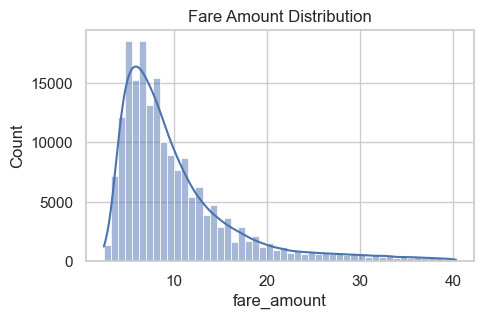

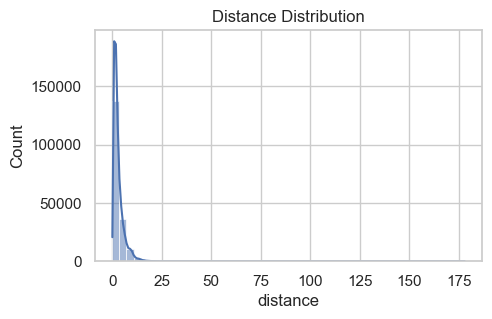

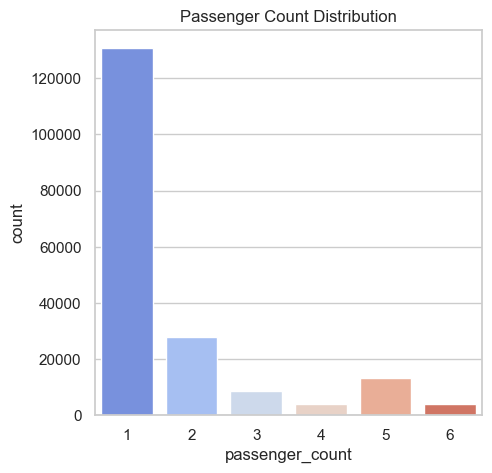

In [318]:
#ploting all the graphs again
# 1. Fare Amount Distribution
plt.figure(figsize=(5,3))
sns.histplot(df_Cleaned2['fare_amount'], bins=50, kde=True)
plt.title('Fare Amount Distribution')
plt.show()
# 2. Distance Distribution
plt.figure(figsize=(5,3))
sns.histplot(df_Cleaned2['distance'], bins=50, kde=True)
plt.title('Distance Distribution')
plt.show()
# 3. Passenger Count Distribution
plt.figure(figsize=(5, 5))
sns.countplot(x='passenger_count', data=df_Cleaned2, palette='coolwarm')
plt.title('Passenger Count Distribution')
plt.show()

In [249]:
df_Cleaned2.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,hour,day_or_night,distance
count,150356.000000,150356.000000,150356.000000,150356.000000,150356.000000,150356.000000,150356,150356.000000,150356.000000,150356.000000
mean,10.168382,-73.913498,40.690387,-73.911486,40.690524,1.686138,2012-03-18 04:32:27.825161728,13.497353,0.474860,2.990969
min,0.010000,-75.426904,-74.015515,-75.458979,-74.015750,1.000000,2009-01-01 00:00:00,0.000000,0.000000,0.000084
25%,6.000000,-73.992437,40.737072,-73.991600,40.736270,1.000000,2010-08-13 00:00:00,9.000000,0.000000,1.263391
50%,8.100000,-73.982312,40.753595,-73.980699,40.754078,1.000000,2012-03-19 00:00:00,14.000000,0.000000,2.126863
75%,12.100000,-73.969275,40.767697,-73.966238,40.768435,2.000000,2013-10-18 00:00:00,19.000000,1.000000,3.736345
max,40.700000,40.806012,42.478467,40.831932,42.464187,6.000000,2015-06-30 00:00:00,23.000000,1.000000,177.995633
std,6.372329,2.669040,2.606512,2.668989,2.606638,1.302110,NaN,6.531466,0.499369,3.132687


In [251]:
output_file_path = 'D:\\Upgrad\\Mentorship\\uber10.csv'
df_Cleaned2.to_csv(output_file_path, index=False)

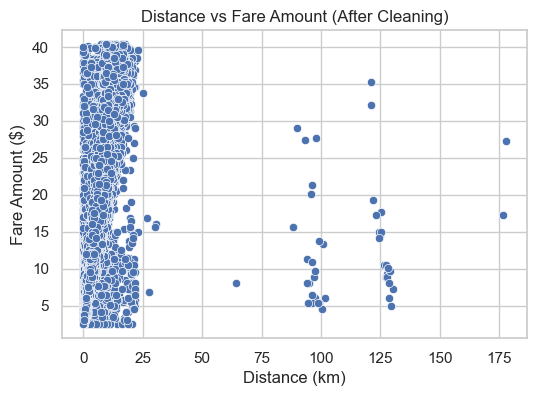

In [319]:
# Visualize the cleaned data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_Cleaned2, x='distance', y='fare_amount')
plt.title('Distance vs Fare Amount (After Cleaning)')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount ($)')
plt.show()

In [320]:
#Remove Outliers in Short Distance Trips
df_Cleaned2 = df_Cleaned2[~((df_Cleaned2['distance'] < 1) & 
                          ((df_Cleaned2['fare_amount'] < 3) | 
                           (df_Cleaned2['fare_amount'] > 30)))]

# Check the updated dataset shape
print(f"Dataset shape after removing outliers: {df_Cleaned2.shape}")

Dataset shape after removing outliers: (186934, 14)


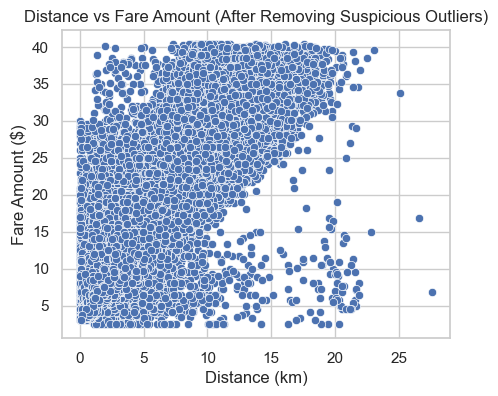

In [321]:
# Define a fare per km threshold
df_Cleaned2['fare_per_km'] = df_Cleaned2['fare_amount'] / df_Cleaned2['distance']

# Remove entries where distance is high but fare is unusually low
# For example: trips with more than 30 km distance but fare per km is less than $2
df_Cleaned2 = df_Cleaned2[~((df_Cleaned2['distance'] > 30) & (df_Cleaned2['fare_per_km'] < 2))]

# Drop the fare_per_km column as it's no longer needed
df_Cleaned2.drop('fare_per_km', axis=1, inplace=True)

# Visualize the cleaned data again
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.scatterplot(data=df_Cleaned2, x='distance', y='fare_amount')
plt.title('Distance vs Fare Amount (After Removing Suspicious Outliers)')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount ($)')
plt.show()

In [322]:
# Split the dataset into train and test sets (80% train, 20% test)
train_data, test_data = train_test_split(df_Cleaned2, test_size=0.2, random_state=42)

# Print the shape of the datasets
print("Train Set Shape:", train_data.shape)
print("Test Set Shape:", test_data.shape)

Train Set Shape: (149508, 14)
Test Set Shape: (37377, 14)


In [261]:
train_data_N, test_data_N = train_test_split(df_Cleaned2, test_size=0.2, random_state=42)

In [323]:
## Data Scaling/Normalization-
# Identify numerical columns to scale
numerical_cols = ['fare_amount', 'distance']
#Code for Data Scaling Using StandardScaler:
from sklearn.preprocessing import StandardScaler

# Apply Standardization
scaler = StandardScaler()
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])
test_data[numerical_cols] = scaler.transform(test_data[numerical_cols])

# Print standardized data
print("Standardized Train Data (First 5 Rows):")
print(train_data.head())
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns to scale
numerical_cols = ['fare_amount', 'distance']

# Apply Min-Max Scaling
scaler = MinMaxScaler()
train_data_N[numerical_cols] = scaler.fit_transform(train_data_N[numerical_cols])
test_data_N[numerical_cols] = scaler.transform(test_data_N[numerical_cols])

# Print scaled data
print("Scaled Train Data (First 5 Rows):")
print(train_data_N.head())

Standardized Train Data (First 5 Rows):
                                  key  fare_amount           pickup_datetime  \
11807    2011-01-23 21:13:00.00000033     0.486570 2011-01-23 21:13:00+00:00   
154068    2014-07-05 10:03:32.0000002    -0.978845 2014-07-05 10:03:32+00:00   
17304   2013-08-17 22:44:00.000000157     0.124156 2013-08-17 22:44:00+00:00   
155976  2012-05-30 06:54:00.000000147    -0.710974 2012-05-30 06:54:00+00:00   
17730    2013-05-19 16:09:00.00000092    -0.427345 2013-05-19 16:09:00+00:00   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
11807         -73.942768        40.839887         -73.905575   
154068        -73.991183        40.760771         -73.988598   
17304         -73.995997        40.732172         -73.982630   
155976        -73.987600        40.747337         -73.979318   
17730         -73.988177        40.743950         -74.001265   

        dropoff_latitude  passenger_count pickup_date pickup_time  hour  \
11807          40.8

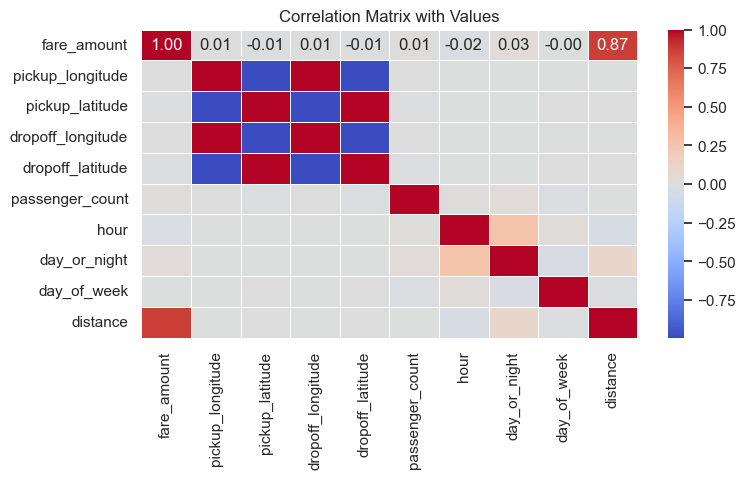


Correlation with Fare Amount:
fare_amount          1.000000
distance             0.868694
day_or_night         0.026854
passenger_count      0.011406
dropoff_longitude    0.008583
pickup_longitude     0.007844
day_of_week         -0.000092
pickup_latitude     -0.005451
dropoff_latitude    -0.005688
hour                -0.022674
Name: fare_amount, dtype: float64


In [324]:
# find Correlation
from sklearn.preprocessing import LabelEncoder

# Label Encoding for categorical columns
label_encoder = LabelEncoder()

df_Cleaned2['day_or_night'] = label_encoder.fit_transform(df_Cleaned2['day_or_night'])
df_Cleaned2['day_of_week'] = label_encoder.fit_transform(df_Cleaned2['day_of_week'])

# Select only numeric columns for correlation
numeric_cols = df_Cleaned2.select_dtypes(include=['number']).columns

# Compute the correlation matrix
correlation_matrix = df_Cleaned2[numeric_cols].corr()

# Plot the heatmap with correlation values inside the matrix
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix with Values')
plt.show()

# Focus on 'fare_amount' correlations and sort
correlation_with_fare = correlation_matrix['fare_amount'].sort_values(ascending=False)
print("\nCorrelation with Fare Amount:")
print(correlation_with_fare)

In [ ]:
# WE Observed highest corelation between distance and fare prices

In [264]:
df_Cleaned.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time,hour,day_or_night,distance,day_of_week
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06,19,1,1.683323,4
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56,20,1,2.457590,0
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00,21,1,5.036377,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,08:22:21,8,0,1.661683,0
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,17:47:00,17,0,4.475450,4
